# Adult income dataset

## Introduction

The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This information makes it possible to plan better services, improve the quality of life and solve existing problems. Statistical information, which serves as the basis for constructing planning forecasts, is essential for the democratic process since it enables the citizens to examine the decisions made by the government and local authorities, and decide whether they serve the public they are meant to help.

### Categorical Attributes
- workclass: Individual work category
- education: Indivi dual's highest education degree
- marital-status: Individual marital status
- occupation: Individual's occupation
- relationship: Individual's relation in a family
- race: Race of Individual
- sex: Female, Male
- native-country: Individual's native country

### Continuous Attributes
- age: Age of an individual
- education-num: Individual's year of receiving education
- fnlwgt: The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
- capital-gain: continuous
- capital-loss: continuous
- hours-per-week: Individual's working hour per week

## Purpose of analysis

The goal of the porfolio is to predict whether a person makes over 50K a year or not given their demographic variation (age, education, gender, workclass, relationship, occupation,..). In order to obtain this, some classification techniques are discovered to yield to the best prediction result.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import copy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

# Read the dataset
df = pd.read_csv('data/portfolio_4.csv')

### Explore the data

In [2]:
df.shape # Display the number of columns and rows

(48842, 15)

In [3]:
df.head() # Display the first 5 rows of the dataframe

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.tail() # Display the last 5 rows of the dataframe

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Variable identification

In [5]:
df.dtypes # Display the datatype of each column

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

### Univariate analysis

In [6]:
df.describe() # Display the statistical summary of the dataframe

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.columns # Display the dataframe columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
df.info() # Display the dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Clean the data 

In [9]:
df.isna().sum() # Detect NaN values in the data

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df.isnull().sum() # Detect null values in the data

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
# Examine '?' in the dataset
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [12]:
# The Adult income dataset uses "?" for missing values instead of the default NaN string for. 
# Thus, examine occurrences of "?" in each column.

col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
2799
5.73%


occupation
2809
5.75%


native-country
857
1.75%




In [13]:
# The result above shows that all three columns are categorical variables. 
# In consideration of the relative low portion of missing data, we remove rows with missing data
df = df[df["workclass"] != "?"]
df = df[df["occupation"] != "?"]
df = df[df["native-country"] != "?"]

df.shape

(45222, 15)

In [14]:
df # Display dataframe

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Bivariate Analysis

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'educational-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

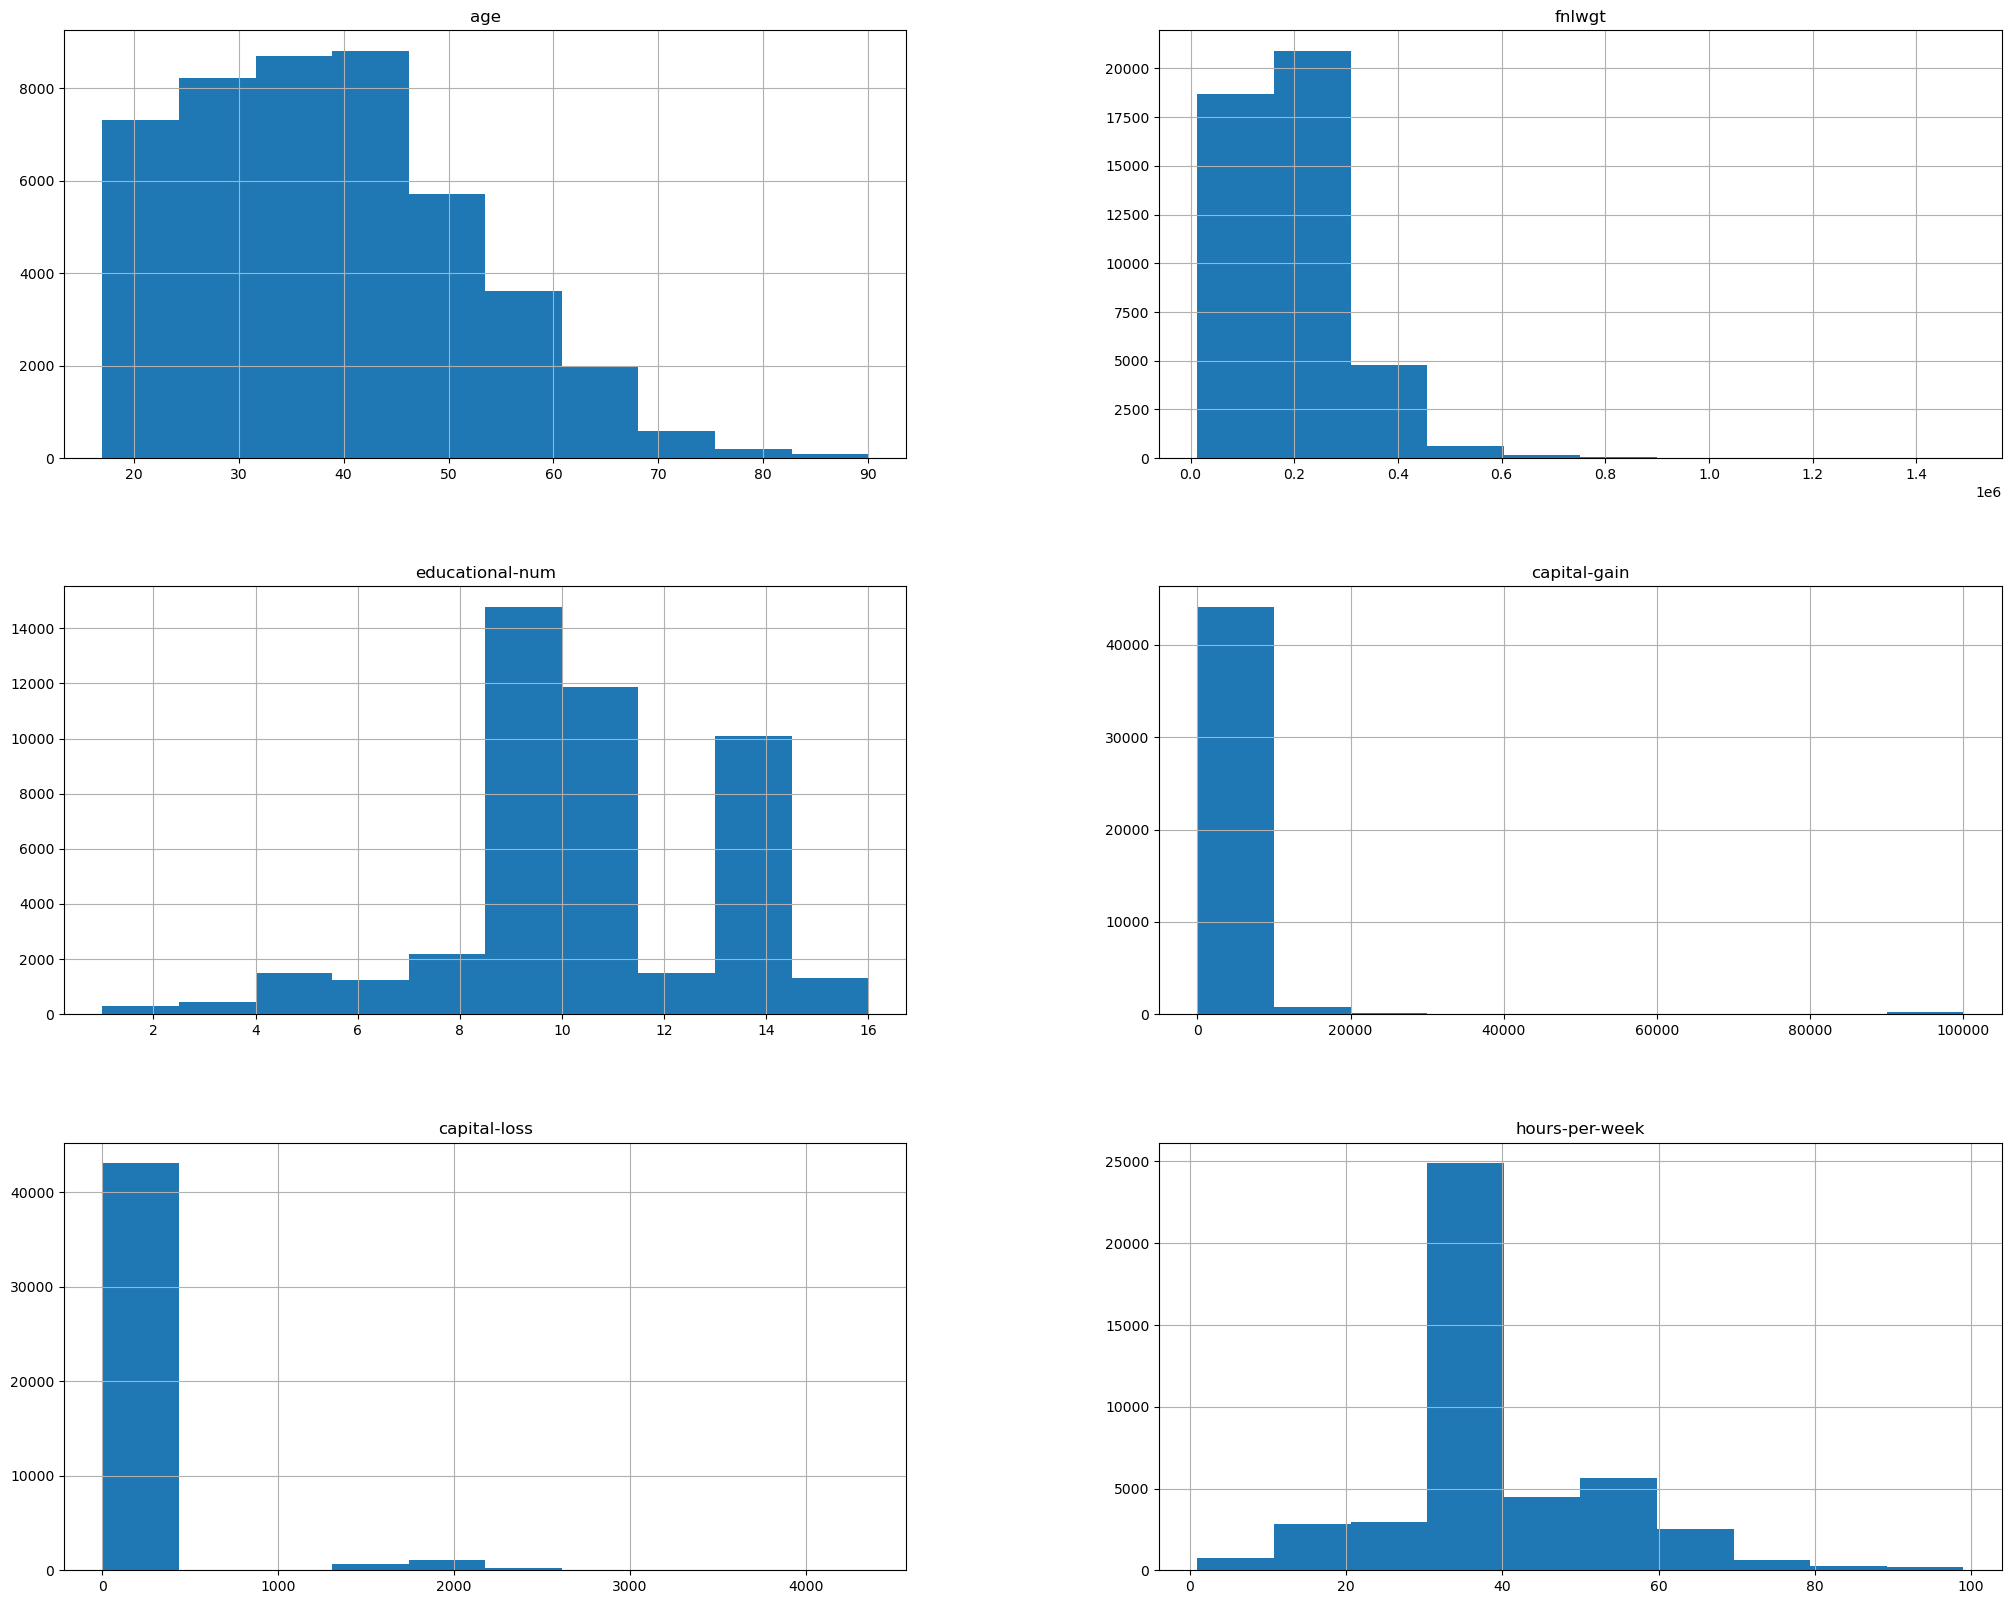

In [15]:
# Histogram plot
df.hist(bins = 10, figsize=(25,20))

<function matplotlib.pyplot.show(close=None, block=None)>

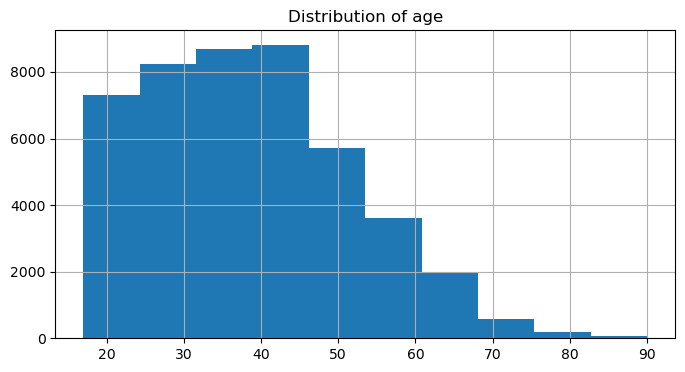

In [16]:
# Histogram shows age distribution
df['age'].hist(figsize = (8,4))
plt.title("Distribution of age")
plt.show

The graph shows the right-skewed distribution and is not symmetric. The lowest and highest age is between 18 to 90.

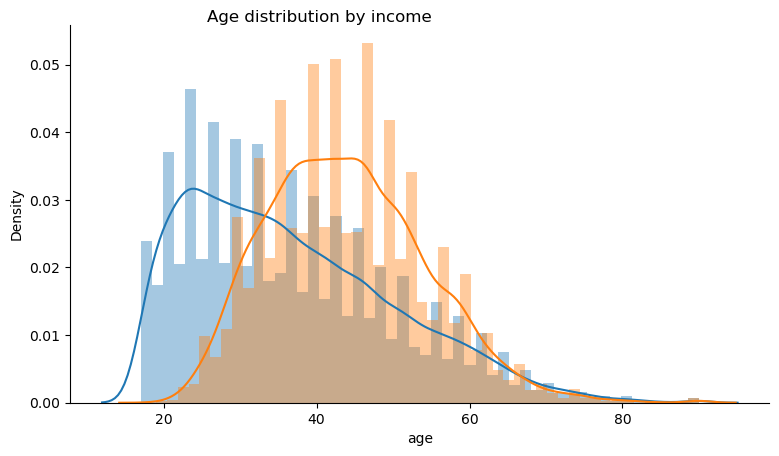

In [17]:
# The plot shows age distribution by income
fg = sns.FacetGrid(df, hue = 'income').map(sns.distplot, 'age')
fg.fig.suptitle("Age distribution by income")
fg.fig.set_size_inches(10, 5)

Based on the graph, we can see that individuals whose ages are around 40 to 50 have a higher income proportion. 

<function matplotlib.pyplot.show(close=None, block=None)>

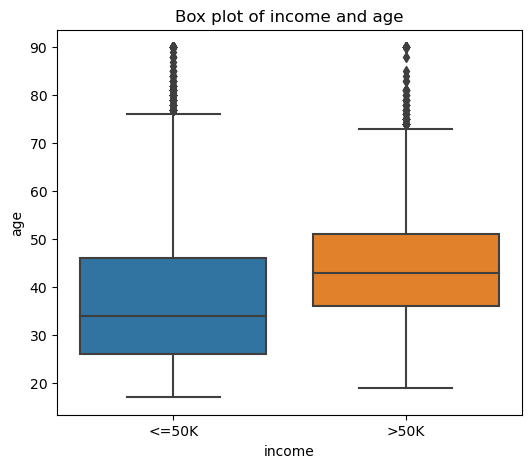

In [18]:
# The boxplot shows age relationship with income
fig = plt.figure(figsize=(6,5))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of income and age')
plt.show

The <=50K income group has a lower median age of 34 years old compared to the >50K income group which has a median age of 42 years old.

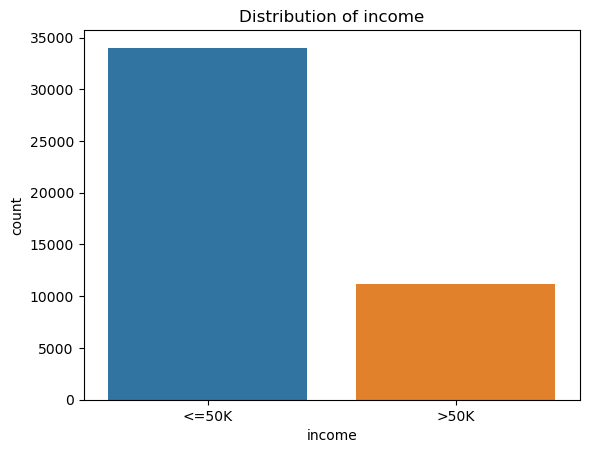

In [19]:
# The countplot depicts the distribution of income
sns.countplot(x='income', data=df)
plt.title("Distribution of income")
plt.show()

From the graph, the individuals with less than 50K annual income are three times higher than the number of people making more than 50K.

Text(0.5, 1.0, 'Workclass and income')

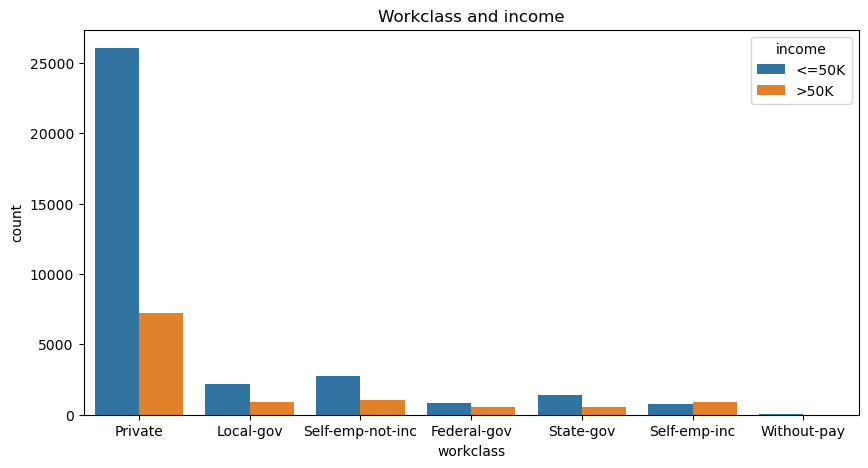

In [20]:
# The countplot represent the occurrence(counts) of the income in the workclass (categorical variable)
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=df).set_title("Workclass and income")

The majority of the workclass variable seems to be made up of private employees.
In all the workclasses, the number of individuals who have income less than 50K is more than the ones earning over 50K.

Text(0.5, 1.0, 'Relationship and income')

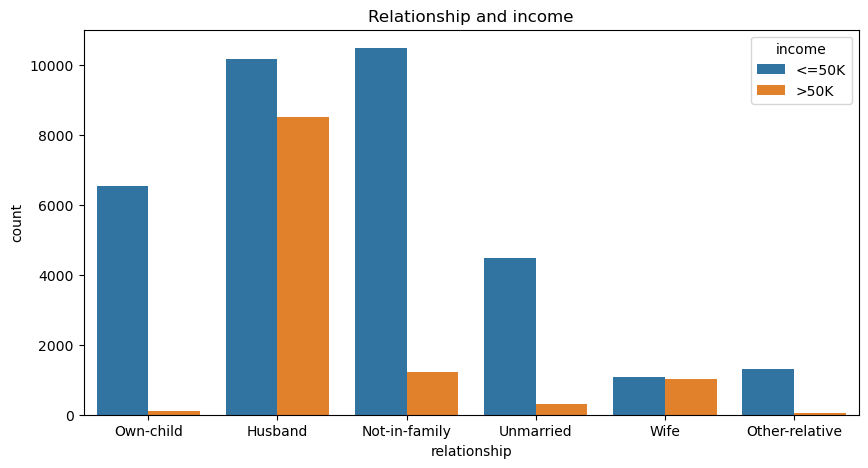

In [21]:
# The countplot represent the occurrence(counts) of the income in the relationship (categorical variable)
plt.figure(figsize=(10,5))
sns.countplot(x="relationship", hue="income", data=df).set_title("Relationship and income")

The majority of individuals, who have more than 50k income, are mostly people not in family.

Text(0.5, 1.0, 'Countplot for gender per class')

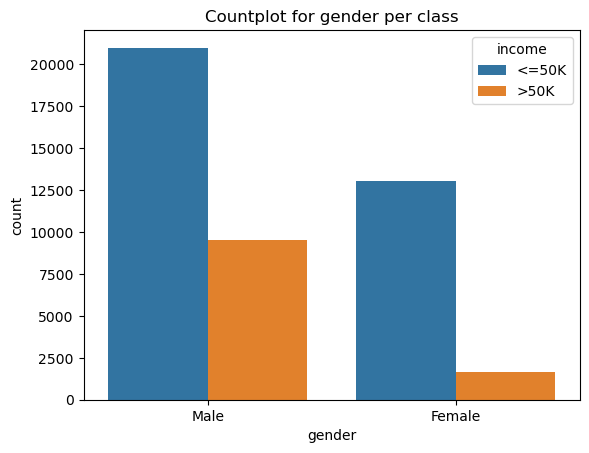

In [22]:
# Count Plot For Gender Per Class
sns.countplot(x='gender' ,data=df, hue='income')
plt.title("Countplot for gender per class")

The proportion of males is higher than females. The number of male individuals tend to earn >50K higher compared to female ones.

Text(0.5, 1.0, 'Distribution plot for hours per week')

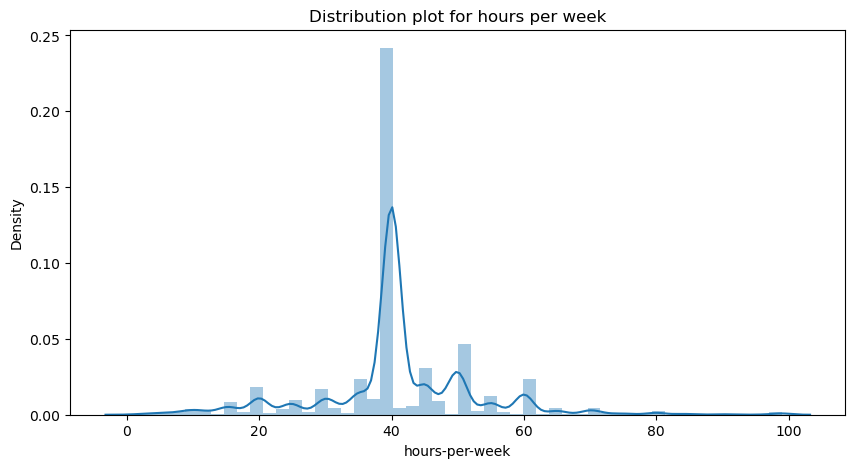

In [23]:
# Distribution plot for hours per week column
plt.figure(figsize=[10,5])
sns.distplot(df['hours-per-week'])
plt.title('Distribution plot for hours per week')

The plot is considerably normally distributed. The majority of people spend from 30 to 40 hours per week for working.

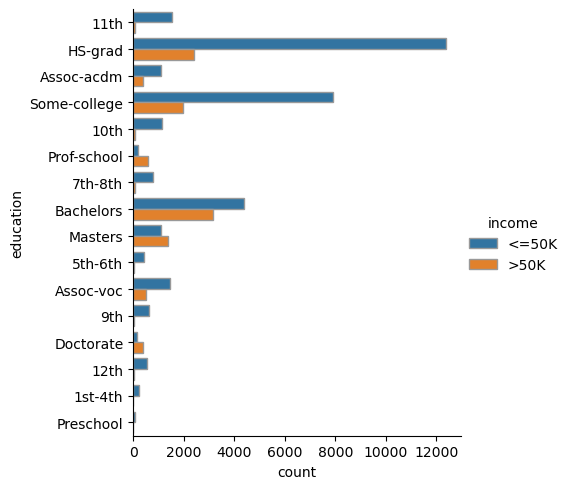

In [24]:
# Categorical plots (education and income)
sns.catplot(y="education", hue="income", kind="count", edgecolor=".6", data=df)

This data is highly composed of people who have education as hs-grad with income less than or equal to 50K.

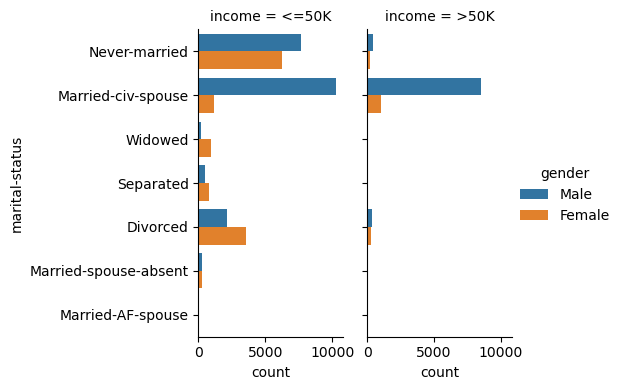

In [25]:
# Categorical plots (marital-status and income based on gender)
sns.catplot(y='marital-status',hue='gender',col='income',data=df,kind='count', height=4,aspect=.7)

The people with marital status as Married-civ-spouse obtain the highest amount of male individuals with income more than 50K.

### Convert object features into digit features by using an encoder

In [26]:
# Encoder gender by using ord_enc.fit_transform to covert categorical variable to numerical variable

df["workclass_code"] = ord_enc.fit_transform(df[["workclass"]]) 
df["fnlwgt_code"] = ord_enc.fit_transform(df[["fnlwgt"]]) 
df["education_code"] = ord_enc.fit_transform(df[["education"]]) 
df["marital-status_code"] = ord_enc.fit_transform(df[["marital-status"]])
df["occupation_code"] = ord_enc.fit_transform(df[["occupation"]]) 
df["relationship_code"] = ord_enc.fit_transform(df[["relationship"]]) 
df["race_code"] = ord_enc.fit_transform(df[["race"]]) 
df["gender_code"] = ord_enc.fit_transform(df[["gender"]]) 
df["native-country_code"] = ord_enc.fit_transform(df[["native-country"]])
df["income_code"] = ord_enc.fit_transform(df[["income"]]) 

### Correlation

In [27]:
df.corr() # The correlation of each column in the DataFrame

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_code,fnlwgt_code,education_code,marital-status_code,occupation_code,relationship_code,race_code,gender_code,native-country_code,income_code
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992,0.085892,-0.077813,-0.003511,-0.271623,-0.004474,-0.247564,0.023776,0.082053,-0.003180,0.237040
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679,-0.034970,0.932590,-0.025318,0.033096,-0.002036,0.009909,-0.029188,0.027240,-0.061098,-0.007264
educational-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206,0.040779,-0.041017,0.347444,-0.064986,0.089686,-0.088431,0.031655,0.003417,0.092994,0.332800
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880,0.034543,-0.005578,0.029889,-0.042399,0.019435,-0.056818,0.014078,0.047444,0.007643,0.221034
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195,0.008233,-0.002417,0.016877,-0.034820,0.015267,-0.058425,0.020955,0.046457,0.005955,0.148687
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000,0.051366,-0.018779,0.060887,-0.183178,0.016160,-0.259194,0.044738,0.231425,0.007554,0.227199
workclass_code,0.085892,-0.034970,0.040779,0.034543,0.008233,0.051366,1.000000,-0.039074,0.017846,-0.033221,0.017508,-0.065049,0.049765,0.069638,0.003889,0.015659
fnlwgt_code,-0.077813,0.932590,-0.041017,-0.005578,-0.002417,-0.018779,-0.039074,1.000000,-0.022771,0.034084,-0.000534,0.007622,-0.014664,0.028050,-0.066841,-0.006492
education_code,-0.003511,-0.025318,0.347444,0.029889,0.016877,0.060887,0.017846,-0.022771,1.000000,-0.041520,-0.033499,-0.013179,0.011457,-0.027569,0.077893,0.081196
marital-status_code,-0.271623,0.033096,-0.064986,-0.042399,-0.034820,-0.183178,-0.033221,0.034084,-0.041520,1.000000,0.016399,0.180436,-0.070302,-0.120008,-0.022721,-0.192711


In [28]:
df.corr()['income_code'].abs().nlargest(6).index # Find the 5 most correlated features with income

Index(['income_code', 'educational-num', 'relationship_code', 'age',
       'hours-per-week', 'capital-gain'],
      dtype='object')

In [29]:
# Show the correlation result between income and the 5 most correlated features
df[['income_code', 'educational-num', 'relationship_code', 'age', 'hours-per-week', 'capital-gain']].corr()

,income_code,educational-num,relationship_code,age,hours-per-week,capital-gain
income_code,1.000000,0.332800,-0.253402,0.237040,0.227199,0.221034
educational-num,0.332800,1.000000,-0.088431,0.037623,0.146206,0.126907
relationship_code,-0.253402,-0.088431,1.000000,-0.247564,-0.259194,-0.056818
age,0.237040,0.037623,-0.247564,1.000000,0.101992,0.079683
hours-per-week,0.227199,0.146206,-0.259194,0.101992,1.000000,0.083880
capital-gain,0.221034,0.126907,-0.056818,0.079683,0.083880,1.000000


In [30]:
df[['educational-num', 'income_code']].corr() # Correlation between educational number and income

,educational-num,income_code
educational-num,1.0000,0.3328
income_code,0.3328,1.0000


In [31]:
df[['relationship_code', 'income_code']].corr() # Correlation between relationship and income

,relationship_code,income_code
relationship_code,1.000000,-0.253402
income_code,-0.253402,1.000000


In [32]:
df[['age', 'income_code']].corr() # Correlation between age and income

,age,income_code
age,1.00000,0.23704
income_code,0.23704,1.00000


In [33]:
df[['hours-per-week', 'income_code']].corr() # Correlation between hours-per-week and income

,hours-per-week,income_code
hours-per-week,1.000000,0.227199
income_code,0.227199,1.000000


In [34]:
df[['capital-gain', 'income_code']].corr() # Correlation between capital gain and income

,capital-gain,income_code
capital-gain,1.000000,0.221034
income_code,0.221034,1.000000


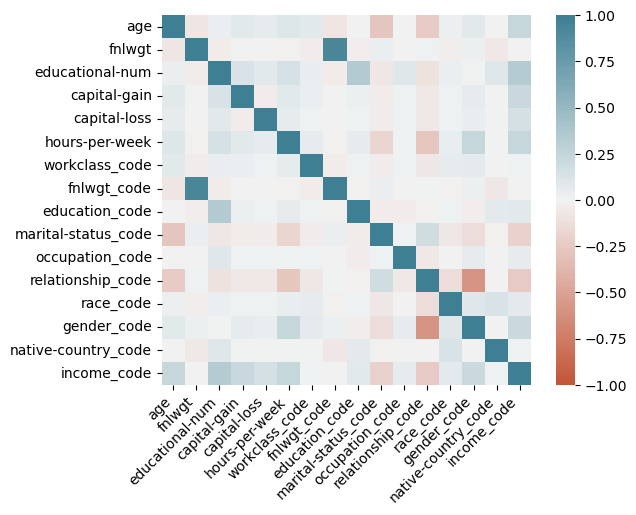

In [35]:
# Correlation heatmap of the dataset
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Analysis Correlation

#### Compare the correlation within the 5 most correlated features and income.

#### Highest correlation 
According to the correlation results, the most correlated feature regarding rating is 0.3328. This result shows a strong positive correlation between education-num (Individual's year of receiving education) and income in comparison to the other features. 

#### Lowest correlation
The correlation coefficient of 0.221034 (nearest to zero) is the lowest compared to other features. It indicates a weak correlation between capital-gain and income.

#### Overall
We can conclude that the order from the highest correlation to the lowest correlation is educational-num, relationship, age, hours-per-week, capital-gain. 

All of the correlated features (except relationship) regarding income are positive meaning that a positive correlation between these features with income. Furthermore, the result demonstrates that the slope will be upward. It implies that the higher the one variable is, the higher the other variable.

The correlation of relationship and income is negative which indicates the slope will be downward. It demonstrates that the higher the one variable is, the lower the other variable.

### Create and re-name some columns of the copy dataset¶

In [36]:
# Create a shallow copy of the original dataframe
df_new = copy.copy(df) 

# Drop the original columns
df_new = df_new.drop(["workclass", "fnlwgt", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country", "income"], axis = 1) 

# Rename the these columns after tranforming
df_new.rename(columns = {"workclass_code": "workclass", "fnlwgt_code": "fnlwgt", "education_code": "education", "marital-status_code": "marital-status", "occupation_code": "occupation", "relationship_code": "relationship", "race_code": "race", "gender_code": "gender", "native-country_code":"native-country", "income_code": "income"}, inplace = True)
df_new

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,7,0,0,40,2.0,18119.0,1.0,4.0,6.0,3.0,2.0,1.0,38.0,0.0
1,38,9,0,0,50,2.0,3913.0,11.0,2.0,4.0,0.0,4.0,1.0,38.0,0.0
2,28,12,0,0,40,1.0,23770.0,7.0,2.0,10.0,0.0,4.0,1.0,38.0,1.0
3,44,10,7688,0,40,2.0,10474.0,15.0,2.0,6.0,0.0,2.0,1.0,38.0,1.0
5,34,6,0,0,30,2.0,15397.0,0.0,4.0,7.0,1.0,4.0,1.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,2.0,20235.0,7.0,2.0,12.0,5.0,4.0,0.0,38.0,0.0
48838,40,9,0,0,40,2.0,9896.0,11.0,2.0,6.0,0.0,4.0,1.0,38.0,1.0
48839,58,9,0,0,40,2.0,9650.0,11.0,6.0,0.0,4.0,4.0,0.0,38.0,0.0
48840,22,9,0,0,20,2.0,15752.0,11.0,4.0,0.0,3.0,4.0,1.0,38.0,0.0


## Training and testing data 

In [37]:
# Split the data into training(80%) and testing data (20%) and use random_state=142
train, test = train_test_split(df_new, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(36177, 15)
(9045, 15)


In [38]:
# Getting input data and targets for building prediction model
X_train = train.drop(['income'], axis=1)
y_train = train['income']
X_test = test.drop(['income'], axis=1)
y_test = test['income']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_train.head())
print(y_train.head())

X_train shape:  (36177, 14)
y_train shape:  (36177,)
X_test shape:  (9045, 14)
y_test shape:  (9045,)
       age  educational-num  capital-gain  capital-loss  hours-per-week  \
26277   25                9             0             0               8   
17105   32                9             0          1672              60   
15375   19               10             0             0              20   
45994   19               10             0             0              16   
9600    29               13             0             0              40   

       workclass   fnlwgt  education  marital-status  occupation  \
26277        2.0  25685.0       11.0             4.0         7.0   
17105        2.0   5765.0       11.0             2.0         3.0   
15375        2.0   1399.0       15.0             4.0         7.0   
45994        1.0  19433.0       15.0             4.0        11.0   
9600         4.0   4918.0        9.0             2.0         3.0   

       relationship  race  gender  nat

## Logistic Regression

### Split the dataset and train a logistic regression model to predict 'income' based on other features. Evaluate the accuracy of the model.

In [39]:
# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
# Doing predictions on train and test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

### Evaluation 

In [41]:
# Evaluate the performance of the trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))

Accuracy score on training set:  0.7984631119219393
Accuracy score on testing set:  0.7938087341072416


In [42]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on test set: 
[[6386  439]
 [1426  794]]


In [43]:
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_hat_train))

Confusion matrix on train set: 
[[25583  1606]
 [ 5685  3303]]


### Feature Selection

In [44]:
# Creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=3, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [45]:
# Doing evaluation
y_test_hat = rfe.predict(X_test)
print("The accuracy score is: ", accuracy_score(y_test, y_test_hat))

The accuracy score is:  0.8023217247097844


In [46]:
# Summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 11.000
Column: 3, Selected False, Rank: 10.000
Column: 4, Selected False, Rank: 6.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected False, Rank: 12.000
Column: 7, Selected False, Rank: 9.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 8.000
Column: 10, Selected False, Rank: 2.000
Column: 11, Selected False, Rank: 3.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 7.000


In [47]:
# To increment number of features, one at each time
acc_scores = []
for i in range(1,14):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # Training model
    rfe.fit(X_train, y_train)
    # Predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # Print this
    print("Accuracy on test set using", i, "features: ", acc_score)
    # Append to the list
    acc_scores.append(acc_score)

Accuracy on test set using 1 features:  0.7545605306799337
Accuracy on test set using 2 features:  0.7789939192924268
Accuracy on test set using 3 features:  0.8023217247097844
Accuracy on test set using 4 features:  0.8005527915975678
Accuracy on test set using 5 features:  0.8018794914317302
Accuracy on test set using 6 features:  0.8015478164731896
Accuracy on test set using 7 features:  0.7954671088999448
Accuracy on test set using 8 features:  0.7976782752902156
Accuracy on test set using 9 features:  0.7944720840243228
Accuracy on test set using 10 features:  0.7990049751243781
Accuracy on test set using 11 features:  0.7948037589828635
Accuracy on test set using 12 features:  0.7857379767827529
Accuracy on test set using 13 features:  0.7978993919292426


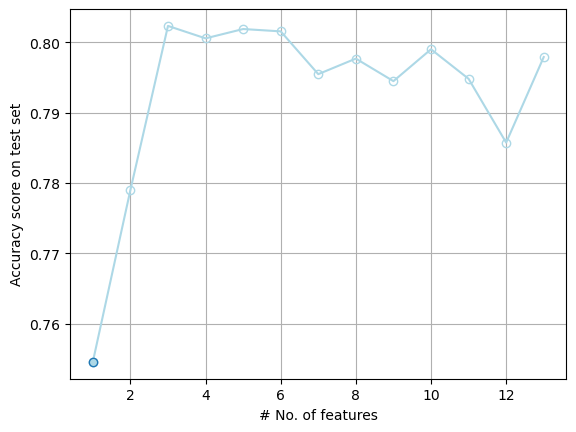

In [48]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 14):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)

best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 14), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

## Explaination
From the summary of all feature results, we can observe that 3 columns (column 1, column 8 and column 12) have the highest ranking. 

To confirm the statement above, the graph shows the accuracy score on the test set using RFE demonstrating the number of features for selection is three features with the highest accuracy.

Thus, it's advisable to select three features to achieve the highest accuracy for this model.

## Analysis
An accuracy score of the logistic model indicates that this model can accurately predict the target variable (income) for 80.23% of the test data. This is considerably a good accuracy score.

## K Nearest Neighbours (KNN)

### Split the dataset and train a KNN model to predict 'income' based on other features. Evaluate the accuracy of the model.

In [49]:
# Create and train a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy score is:', accuracy)

The accuracy score is: 0.7990049751243781


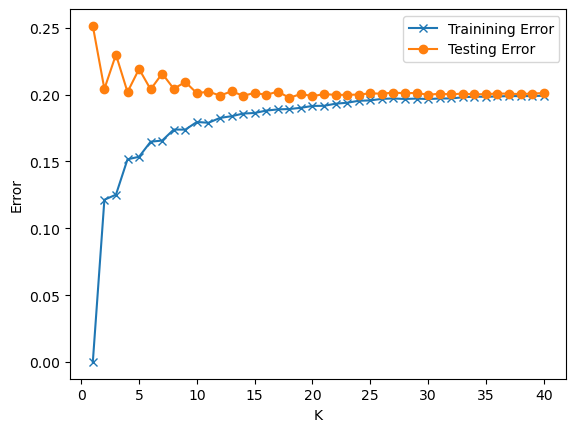

In [50]:
# Plot the accuracy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test), y_test))

# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

### k-fold cross validation

In [51]:
# Create a KNN classifier model and use k-fold cross validation for testing accuracy estimation
clf = KNeighborsClassifier(n_neighbors = 10)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.79546711 0.80375898 0.79104478 0.79961305 0.80154782 0.79961305
 0.79961305 0.79623998 0.80564003 0.79762234]
Average accuracy: 0.7990 +- 0.0040


### Tune the hyper-parameter K in KNN to see how it influences the prediction performance

In [52]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 41)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X_train, y_train)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy score is:', clf.best_score_)

Best K value:  14
The accuracy score is: 0.8011444406083733


### Analysis
The accuracy score of the KNN model is slightly lower than the accuracy score of the logistic regression model. 

In fact, after tuning the hyperparameter K, the accuracy score of the KNN model is slightly improved compared with the logistic regression model.

The KNN model is a good model for the adult income dataset; however, it is more important to tune the hyperparameter K to find the best value for the accuracy score to predict the adult's income.

## Multinomial Naive Bayes

In [53]:
# Create and train a Multinomial Naive Bayes classifier model
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)

MultinomialNB()

In [54]:
# Evaluate the model
y_pred = clf_mnb.predict(X_test)
clf_accuracy = accuracy_score(y_test, y_pred)
print('The accuracy score is:', clf_accuracy)

The accuracy score is: 0.7741293532338308


## Decision Tree

In [55]:
# Create and train a Decision Tree classifier model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
# Evaluate the model
dtree_y_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_y_pred)
print('The accuracy score is:', dtree_accuracy)

The accuracy score is: 0.8092868988391376


## Random Forest

In [57]:
# Create and train a Random Forest classifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
# Evaluate the model
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print('The accuracy score is:', rf_accuracy)

The accuracy score is: 0.8572692095080154


### Discuss the performance of the five model for solving this classification problem

In [59]:
# Display the accuracy result of 5 models
print('The KNN model accuracy: ', clf.best_score_)
print('The Logistic Regression model accuracy: ', np.max(acc_scores))
print('Then Multinomial Naive Bayes model accuracy: ',  clf_accuracy)
print('The Decision Tree model accuracy: ', dtree_accuracy)
print('The Random Forest model accuracy: ', rf_accuracy)

The KNN model accuracy:  0.8011444406083733
The Logistic Regression model accuracy:  0.8023217247097844
Then Multinomial Naive Bayes model accuracy:  0.7741293532338308
The Decision Tree model accuracy:  0.8092868988391376
The Random Forest model accuracy:  0.8572692095080154


(0.4, 1.0)

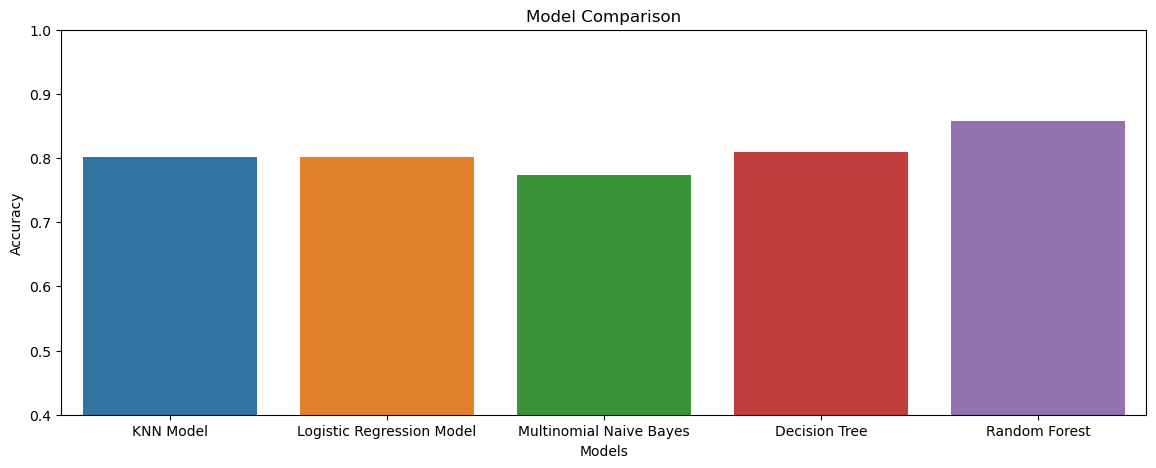

In [60]:
# Plot the accuracy result of KNN model and Logistic Regression model
plt.figure(figsize = (14, 5))
sns.barplot(x = ['KNN Model', 'Logistic Regression Model', 'Multinomial Naive Bayes', 'Decision Tree', 'Random Forest'], 
            y = [clf.best_score_, np.max(acc_scores), clf_accuracy, dtree_accuracy, rf_accuracy]).set(title = "Model Comparison", ylabel = 'Accuracy', xlabel = 'Models')

# Set the scale for the y-axis from 0.4 to 1.0 as the accuracy score of 5 models are within this range
plt.ylim(0.4, 1.0)

### Analysis
The graph depicts the five models' accuracy score results.

From the bar chart, we can conclude that the accuracy of the Random Forest model has the best performance among the five models for predicting adults' income based on several factors. 

Both Random Forest and Decision Tree models perform high accuracy score on the test set. Nevertheless, the Random Forest model demonstrates a higher accuracy percentage than the Decision Tree model on the adult income dataset.

The Logistic Regression and KNN models are considerably decent models for adult income dataset; however, they are not as precise as the Random Forest and Decision Tree models. Furthermore, the KNN model generates higher accuracy test results to compare with the Logistic Regression model.

The Multinomial Naive Bayes model achieves the lowest accuracy score compared to other models at 77.41%.

Overall, the Random Forest model offers the highest accuracy score which makes it a favorable choice for predicting adult income.